# Chapter 7: Unsupervised learning

In this notebook, we will discuss different techniques for unsupervised learning and will focus on several clustering techniques. After considering basic concepts like distance and similarity, taxonomy of clustering techniques and goodness of clustering quality, we will explore three basic clustering techniques, namely, K-means, spectral clustering and hierarchical clustering. At the end, we will illustrate the use of clustering techniques on a real problem: defining groups of countries according to their economic expenditure on education.


## 1. Introduction to unsupervised learning

In machine learning, the problem of unsupervised learning is that of trying to **find hidden structure in unlabeled data**. Since the examples given to the learner are unlabeled, there is **no error or reward signal** to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning. 

Unsupervised learning is defined as the set of algorithms which learns from a **training set of unlableled or unannotated** examples, using the features of the inputs to categorize them together according to some **geometric** or **statistical** criteria. 

Unsupervised learning encompasses many techniques that seek to **summarize and explain key features** of the data. Many methods employed in unsupervised learning are based on *data mining* methods used to preprocess data.

Different *kinds* of unsupervised learning problems:

+ *Clustering:* partition examples into groups when no pre-defined categories/classes are available.
+ *Dimensionality reduction:* principal component analysis, independent component analysis, non-negative matrix factorization.
+ *Outlier detection:* find unusual events (e.g. malfunction).
+ *Novelty detection:* find changes in data.

The most common unsupervised task is **clustering**. In this notebook, we will focus on the clustering and dimensionality reduction (in brief) tasks.

## 2. Clustering

**Partition** unlabeled examples into *disjoint subsets of clusters*, such that:

+ Examples within a cluster are similar (*high intra-class* similarity).
+ Examples in different clusters are different (*low inter-class* similarity).

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

### Important questions in clustering

+ What is a *natural grouping* among these objects? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?
 

<div class="alert alert-info"> **IMPORTANT IDEA: ** Clustering is subjective issue.
</div>

Clustering will help us to analyze and get insight of the data, but the quality of the partition **depends on the application and the analyst**.

## 2.1 Similarity and distance

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is the Minkowski distance:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well-known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance.

## 2.2 What is a good clustering? Defining metrics to measure clustering quality

The **Rand index** or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

Given a set of n elements $S = \{o_1, \ldots, o_n\}$ and two partitions of S to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:

+ a, the number of pairs of elements in S that are in the same set in X and in the same set in Y
+ b, the number of pairs of elements in S that are in different sets in X and in different sets in Y
+ c, the number of pairs of elements in S that are in the same set in X and in different sets in Y
+ d, the number of pairs of elements in S that are in different sets in X and in the same set in Y.

The Rand index, R, is:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$


A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of the same original (a single) class.


A clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same automatic cluster.

Both scores have positive values between 0.0 and 1.0, larger values being desirable.

In [1]:
import matplotlib.pylab as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
from sklearn import metrics
metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [3]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [4]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [5]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [6]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


In [7]:
print metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0


In [8]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [9]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.0


In [10]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [11]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


**V-measure** cluster labeling given a ground truth:
The V-measure is the harmonic mean between homogeneity and completeness:

  $v = 2 * (homogeneity * completeness) / (homogeneity + completeness)$

Is the  metric dependent of the absolute values of the labels?: will a permutation of the class or cluster label values change the score value in any way?

Is the metric symmetric wrt the switching label_true with label_pred?

This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [12]:
print metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1])

print  metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0
1.0


**Question:** Labelings that **assign all classes members to the same clusters** are: ______________, but not __________:

In [13]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


Labelings that have pure clusters with members coming from the same classes are _ but un-necessary splits harm __ and thus penalize V-measure as well:

In [14]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


If classes members are **completely split across different clusters**, the assignment is totally incomplete, hence the V-Measure is null:

In [15]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


Clusters that include samples from **totally different classes** totally destroy the ____________ of the labeling, hence:

In [16]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


**Advantages**

+ **Bounded scores**: 0.0 is as bad as it can be, 1.0 is a perfect score.

+ **Intuitive interpretation**: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

+ **No assumption** is made on the cluster structure: can be used to compare clustering algorithms such as K-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ The previously introduced metrics are **not normalized with regards to random labeling**: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence V-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

+ This problem can safely be ignored when **the number of samples** is high i.e. more than a thousand and the number of clusters is less than 10. 

+ These metrics require the **knowledge of the ground truth classes** while almost never available in practice or require manual assignment by human annotators (as in the supervised learning setting).

And if we do not have ground truth?


The **Silhouette Coefficient** is calculated using the *mean intra-cluster distance* (a) and the *mean nearest-cluster distance* (b) for each sample. The Silhouette Coefficient for a sample is:

                           (b - a) / max(a, b).

where b is the distance between a sample and the nearest cluster that the sample is not part of. Note that Silhouette Coefficent is only defined if number of labels is: $ 2 <= n_{labels} <= n_{samples} - 1$ (WHY?).

**Test:** 

+ The best value is _____.

+ The worst value is _____. 

+ Pixel values near 0 indicate ________. 


*Advantages**

The score is bounded between -1 and +1. Scores around zero indicate ___________ clusters (WHY?).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters. WHY?

## 2.3 Clustering techniques: how to group samples?

There are two big families of clustering techniques:

+ **Partitional algorithms:** Start with a random partititon and refine it iteratively.
+ **Hierarchical algorithms:** Agglomerative (bottom-up), top-down.

### Partitional algorithms

Partitional algorithms can be divided in two branches:

+ Hard partition algorithms, such as *K-means*, assign a unique cluster value to each element in the feature space.
+ Soft partition algorithms, such as *Mixture of Gaussians*, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest, but one of the famest methods: K-means.


### 2.3.1 K-means algorithm

**Algorithm:**
1. Initialize the value  $K$ of desirable clusters.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean).
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see this in action:

In [17]:
import numpy as np


#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

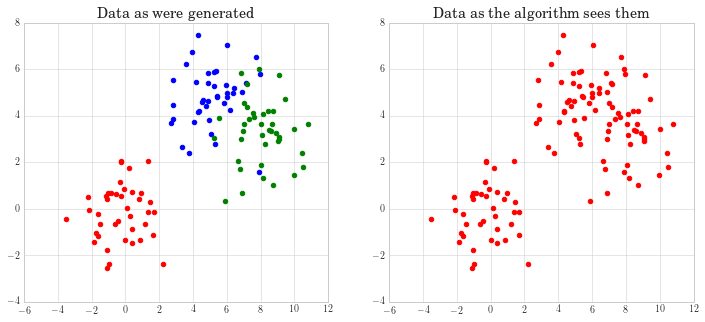

In [18]:
#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

plt.savefig("files/ch07/sample.png",dpi=300, bbox_inches='tight')


In [19]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

**Note**: Each clustering algorithm comes in two variants: a class, that implements the *fit* method to learn the clusters on train data, and a *predict* function, that, given test data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the *labels_* attribute.
    

In [20]:
print clf.labels_    # or
print clf.predict(X) # equivalent

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0]


In [21]:
print X[(y==1).ravel(),0] #numpy.ravel() returns a flattened array
print X[(y==1).ravel(),1]

[  1.68495257e+00   1.18787529e+00  -2.87912375e-01   2.22427554e+00
  -6.15009050e-01  -3.52057534e+00  -1.09067427e+00   1.13290504e-01
  -1.05875981e+00   3.66966256e-01  -3.33311746e-01   4.06520725e-01
  -1.48046425e+00  -1.01329886e+00   4.06130648e-01   2.72213110e-01
  -2.48203568e-01   1.35404711e+00   1.65847229e+00   2.12095358e-01
   1.35910741e+00  -1.63322410e+00   3.29977911e-03  -1.64009448e+00
   7.93824348e-01  -1.73752243e+00  -4.24378182e-01  -2.19035586e+00
  -1.87236202e+00  -1.12938327e+00  -8.67069578e-01   1.44028966e+00
   8.63575648e-01  -2.13491799e+00  -9.85450693e-01  -5.42361187e-01
  -1.06689541e-01   9.46281652e-01  -1.06830788e+00  -2.78138624e-01]
[-0.15191592 -0.68723311  1.99545725 -2.39591021 -0.65635444 -0.46614659
 -2.57551534  0.01705498 -1.80384262 -1.50137907  1.14933675  0.72159813
 -0.67295941  0.65381336 -0.89643132 -0.30949457  2.03784431 -0.16769316
 -1.15288769  1.75422518  2.03226099 -0.24421763 -1.33593856 -1.1743961
  0.42141162 -1.04

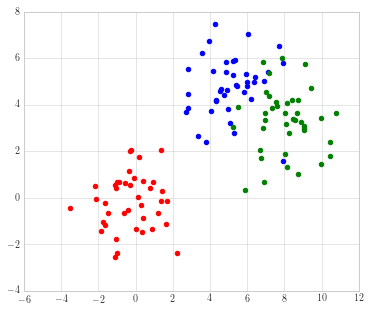

In [22]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [23]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] 
    # c_ translates slice objects to concatenation along the second axis.

In [24]:
Z=clf.predict(data) # returns the labels of the data
print Z

[2 2 2 ..., 0 0 0]


**How many "misclusterings" do we have?**

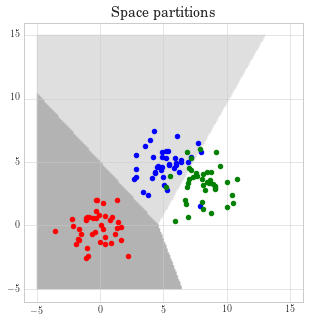

In [25]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

plt.savefig("files/ch07/samples3.png",dpi=300, bbox_inches='tight')


In [26]:
clf = cluster.KMeans(n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data=np.c_[XX.ravel(),YY.ravel()] 
Z=clf.predict(data) # returns the clustering labels of the data

**Visualizing true labels by colored points and space tesselation:**

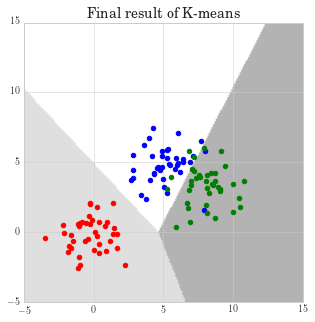

In [27]:
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

plt.savefig("files/ch07/randscore.png",dpi=300, bbox_inches='tight')


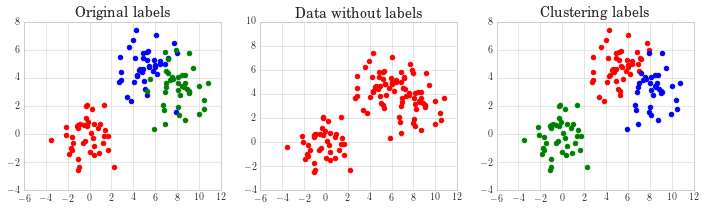

In [28]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))


The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster **“centroids”**. 

      Shell the centroids belong to the original set of points?

The K-means algorithm aims to choose centroids minimizing a criterion known as the **inertia** <inertia> or **within-cluster** sum-of-squares:

  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

**Inertia**, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

Several issues should be taken into account:

+ Inertia makes the **assumption** that clusters are **convex and isotropic** (WHY?), which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

+ Can the algorithm assures **converging** to the global minimum? - Given enough time, K-means will always converge.

+ This algorithm requires the **number of clusters to be specified**. 

+ It scales well to **large number of samples** and has been used across a large range of application areas in many different fields.






The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

    

**Notes:** Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 **Summary:**
 
 + (+) Select good seeds using a heuristic (e.g. seeds with large distance among them).
 + (+) Try out multiple starting points. 
 + (+) Initialize with the results of another method.
 
 
 + (-) Tends to look for spherical clusters.
 + (-) Prone to local minima stabilization.

In [29]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, 
                     max_iter=300, n_init=10) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering

print 'Final evaluation of the clustering:'

print('Inertia: %.2f' %  clf.inertia_)

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), 
                                                               clf.labels_))

print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), 
                                                      clf.labels_))

print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), 
                                                        clf.labels_))
             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  
                                                    metric='euclidean'))

Final evaluation of the clustering:
Inertia: 355.83
Adjusted_rand_score 0.86
Homogeneity 0.84
Completeness 0.84
V_measure 0.84
Silhouette 0.52


In [30]:
clf1 = cluster.KMeans(n_clusters=K,  init='random', random_state=0, 
                      max_iter=2, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering

print 'Final evaluation of the clustering:'

print ('Inertia: %.2f' % clf1.inertia_)

print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), 
                                                            clf1.labels_))

print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), 
                                                      clf1.labels_))

print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), 
                                                        clf1.labels_))
             
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), 
                                                  clf1.labels_))

print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, 
                                                    metric='euclidean'))

Final evaluation of the clustering:
Inertia: 383.58
Adjusted_rand_score 0.78
Homogeneity 0.79
Completeness 0.80
V_measure 0.80
Silhouette 0.52


### 2.3.2 Spectral clustering

Our next method in this notebook will be spectral clustering. 

Up to this point, we have considered clustering as finding data groups following a notion of compactness. Another way of looking at what a cluster is, is given by the connectivity (or similiarity).

**Spectral clustering** refers to a family of methods that use spectral techniques. Specifically, these techniques are related to the eigen-decomposition of an affinity or similarity matrix and attempt to solve the problem of clustering according to connectivity.
Let us consider an ideal similarity matrix of two clear sets.

 Let us denote the similarity matrix, S, as the matrix Sij = s(xi; xj) gives the similarity between observations xi and xj. The simplest similarity measure is the Euclidean distance.

We expect that when two points are from different clusters, they are far away. However, it might also happen that two points from the same cluster are also far away, but still belong to the same cluster as soon as there is a sequence of points from the same cluster that form a path between them. Then, we compute an affinity matrix $A$. $A_{ij} >= 0$ represents a measure of the similarity between data points with indexes $i$ and $j$, hence $A$ is made of positive values and is symmetric.   An easy way to do it is by applying a k-nearest neighbour to build a graph connecting just the k closest dataset points.  Using the affinity matrix, clustering is considered as a graph-partition problem, where connected graph components are interpreted as clusters. The graph constructed by the spectral clustering must be partitioned such that edges connecting different clusters should have low weighs, and edges within the same cluster must have high values. Additionally to the affinity matrix, we need a degree matrix D so that each diagonal value is the degree of the respective graph node and all other positions are zero. Finally, we compute the unnormalized graph Laplacian ($U = D A$).

If we assume that there are k clusters, the next step is to find the k smallest eigenvectors, without considering the trivial constant eigenvector. Each row of the matrix formed by the k smallest eigenvectors of the Laplacian matrix defines a transformation for data xi. Thus, in this transformed space, we can apply the K-means clustering in order to find the final clusters. If we do not know in advance the number of clusters k, we can look for sudden change in the sorted eigenvalues of the matrix, U and keep the smallest ones. 

Let us illustrate it on some eamples with non Gaussian distribution. Scikit-learn has a library to generate  datasets with different shapes like moons, blobs, etc.

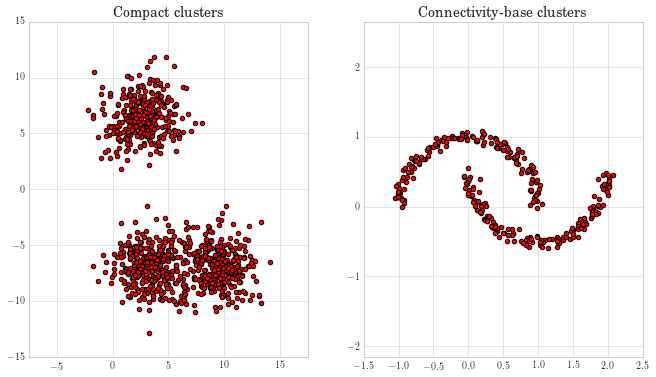

In [31]:
from sklearn.datasets.samples_generator import make_blobs,make_moons

X, labels_true = make_blobs(n_samples=1000, centers=3, cluster_std=[1.7,1.7,1.7])

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Compact clusters',size=14)

[Xmoons, ymoons] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters', size=14)
fig = plt.gcf()
fig.set_size_inches((11,6))

Let us apply the Spectral clustering to the two moons toy problem. 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances
 
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
 
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(Xmoons)
 
# Compute distances
distances = euclidean_distances(Xmoons)
    
spectral = cluster.SpectralClustering(n_clusters=2, 
                                      affinity="nearest_neighbors")
 
spectral.fit(Xmoons)
y_pred = spectral.labels_.astype(np.int)
            

/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Following, we visualize the spectral clustering results:

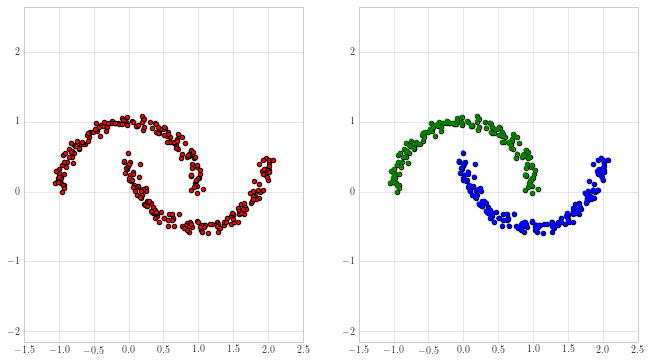

In [33]:

plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
 
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred==0, 0], Xmoons[y_pred==0, 1], c='b', 
            marker='o',s=20) 
plt.scatter(Xmoons[y_pred==1, 0], Xmoons[y_pred==1, 1], c='y', 
            marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((11,6))
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], color=colors[y_pred].tolist(), 
            s=10)

Let us compare the result to the K-means:

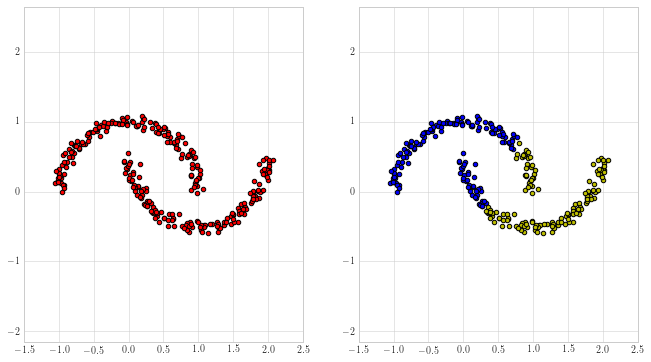

In [34]:
plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
 
# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(Xmoons)
y_pred=clf.predict(Xmoons)
 
# Visualize k-means result
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred==0, 0], Xmoons[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(Xmoons[y_pred==1, 0], Xmoons[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((11,6))

Note that since K-means looks for spheric clusters, it is unable to separate the two moon data, in contrast to the spectral clustering. 

**Observations:**

+ In most of the cases, the clustering is performed on the **graph Laplacian matrix** ($L = D - A$), where $D$ is the **degree matrix** (a diagonal matrix where each element $d_{i,j}$ counts the number of edges the node has) and the role of the similarity matrix is now given by the **affinity matrix** ($A$).
+ Because the Laplacian is related to $-A$, instead of computing the second larger eigenvector,  the second smaller eigenvector is checked.

###2.3.3 Hierarchical clustering

Another interesting clustering technique is hierarchical clustering. Hierarchical clustering is a general family of clustering algorithms that build nested clusters by *merging or splitting* them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the *leaves* being the clusters with only one sample. This is a nice tool, because of its interpretability. The result of the technique is a *tree* showing the similarity among the samples. *Partitioning* is computed by selecting a cut on that tree at a certain level. The tree is usually called **dendrogram**.

**Bottom-Up agglomerative clustering sketch of algorithm**

+ Starts with each sample data in a separate cluster.
+ Then, repeatedly joins the closest pair of clusters.
+ Until there is only one cluster.

The history of merging forms a binary tree or hierarchy.

**Top-Down divisive clustering sketch of algorithm**

+ Starting with all the data in a single cluster.
+ Consider every possible way to divide the cluster into two. Choose the best division.
+ Recursively operate on both sides.

The **Agglomerative Clustering** performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

** Defining the similarity of two clusters:**

The linkage criterion determines the metric used for the merge strategy:

+ *Maximum* or *complete* linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.

+ *Average* linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.

+ *Single* linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.

+ *Ward* minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

AgglomerativeClustering can also *scale to large number* of samples when it is used jointly with a *connectivity matrix*, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

Let us illustrate how the different linkages work with an example. Let us generate three clusters as follows:

In [35]:
MAXN1 =500
MAXN2 =400
MAXN3 =300
X1 = np.concatenate ([2.25*np.random.randn(MAXN1,2),4+1.7* np.random.randn (MAXN2 ,2)])
X1 = np.concatenate ([X1,[8,3]+1.9* np.random.randn(MAXN3 ,2)])
y1 = np.concatenate ([ np.ones ((MAXN1,1)),2* np.ones((MAXN2,1))])
y1 = np.concatenate ([y1,3* np.ones((MAXN3,1))]).ravel()
y1 = np.int_(y1)
labels_y1=['+','*','o']
colors=['r','g', 'b']

Let us apply agglomerative clustering using the different linkages:

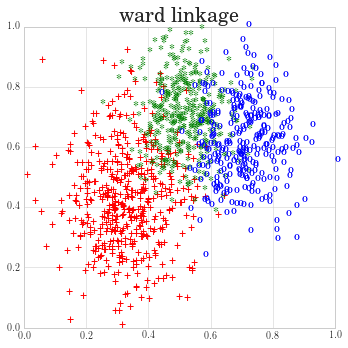

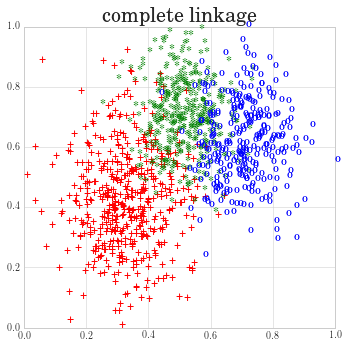

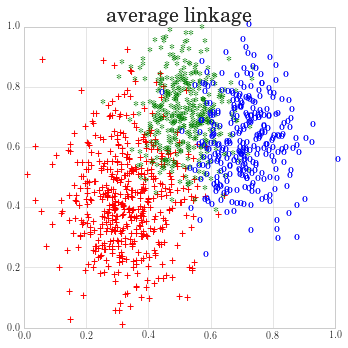

In [36]:
import time

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'complete', 'average'):
    clustering = AgglomerativeClustering(linkage=linkage,n_clusters =3)
    clustering.fit(X1)
    
    x_min , x_max = np.min (X1, axis =0) , np.max (X1,axis =0)
    X1 = (X1 - x_min ) / ( x_max - x_min )
    fig = plt.figure ()
    fig.set_size_inches((5,5))
    for i in range (X1.shape [0]) :
        plt.text(X1[i,0],X1[i,1],labels_y1[y1[i]-1],color=colors[y1[i]-1])
    plt.title ("%s linkage" % linkage,size =20)
    plt.tight_layout()
    plt.savefig("files/ch07/%slinkage.png" % linkage,dpi=300, bbox_inches='tight')

    
plt.show()


Agglomerative clustering has a “rich get richer” behavior that leads to *uneven cluster sizes*. In this regard, complete linkage is the worst strategy, and *Ward* gives the most regular sizes. However, the affinity cannot be varied with Ward, thus for non Euclidean metrics, *average linkage* is a good alternative. Let us illustrate the performance on some other datasets with more complex distributions:

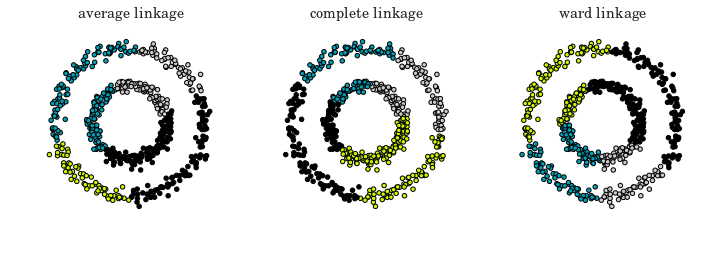

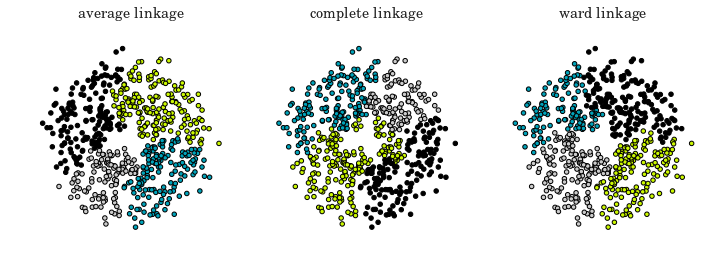

In [37]:

from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering

[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.05)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.15)

n_clusters=4

for X in [X1,X2]:
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    
    plt.show()



 ### 2.3.4 Adding connectivity constraints

An interesting aspect of Agglomerative Clustering is that connectivity constraints can be added to this algorithm (only adjacent clusters can be merged together), through a connectivity matrix that defines for each sample the neighboring samples following a given structure of the data. For instance, in the swiss-roll example below, the connectivity constraints forbid the merging of points that are not adjacent on the swiss roll, and thus avoid forming clusters that extend across overlapping folds of the roll.

These constraints are useful to *impose a certain local structure*, but they also make the algorithm **faster**, especially when the number of the samples is high.
The connectivity constraints are imposed via a **connectivity matrix**: a scipy sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected. 

This matrix can be constructed from *a-priori information*: for instance, you may wish to cluster web pages by only merging pages with a *link pointing from one to another*. 

It can also be learned from the data, for instance using sklearn.neighbors.kneighbors_graph to restrict merging to nearest neighbors as in this example, or using sklearn.feature_extraction.image.grid_to_graph to enable only merging of neighboring pixels on an image.

This example shows the effect of imposing a connectivity graph to capture local structure in the data. The graph is simply the graph of 20 nearest neighbors.
Two consequences of imposing a connectivity can be seen. First clustering with a connectivity matrix is much faster.
Second, when using a connectivity matrix, average and complete linkage are unstable and tend to create a few clusters that grow very quickly. Indeed, average and complete linkage fight this percolation behavior by considering all the distances between two clusters when merging them. The connectivity graph breaks this mechanism. This effect is more pronounced for very sparse graphs (try decreasing the number of neighbors in kneighbors_graph) and with complete linkage. In particular, having a very small number of neighbors in the graph, imposes a geometry that is close to that of single linkage, which is well known to have this percolation instability.

a
b


/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)


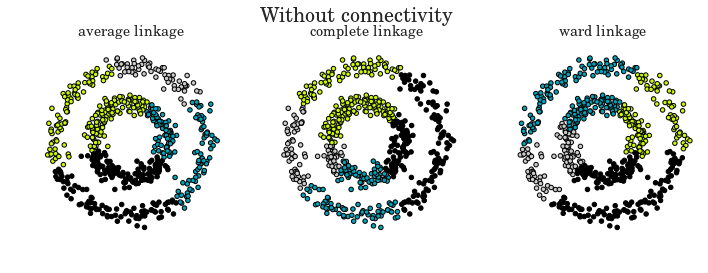

b


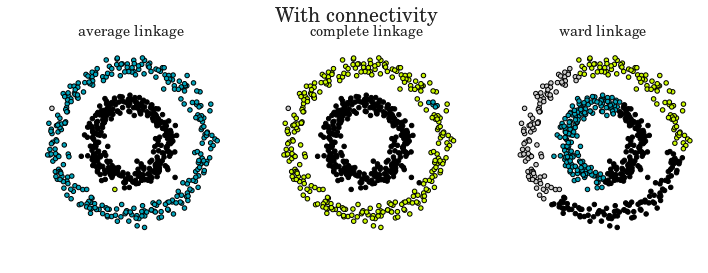

a
b


/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)


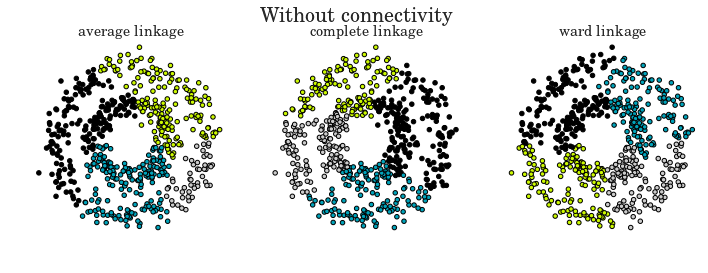

b


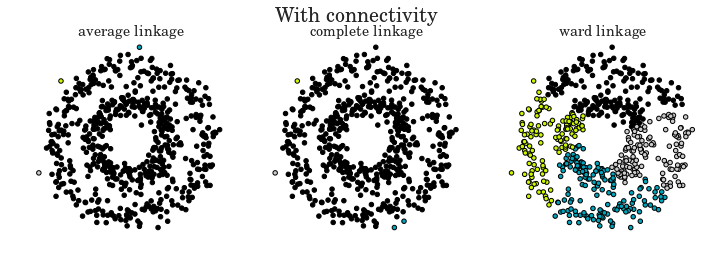

In [41]:
[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.07)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.1)

for X in [X1,X2]:
  knn_graph = kneighbors_graph(X, 5)
  for connectivity in (None, knn_graph):
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters, 
                                            connectivity=connectivity)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    if connectivity is None:
        plt.suptitle('Without connectivity', size=20)
    else: plt.suptitle('With connectivity', size=20)
    # plt.suptitle('Without connectivity: %r' % connectivity is None, size=20)
    plt.show()

### 2.3.5 Comparing different clustering algorithms on toy datasets

Following, we compare the diffeerent clustering algorithms, discussed so far.
Let us generate 4 cases of diffeerent samples configurations:

+ a) of separated circular groups of data,
+ b) uniform data distribution,
+ c) embedded circles and
+ d) non-flat configurations of data.


To this purpose, scikit-learn has predefined functions like: datasets.make\_blobs(), datasets.make\_circles(), datasets.make\_moons(), etc.
The code provided by scikit-learn for generating the testing samples
distributions is as follows:

In [60]:
from sklearn import cluster, datasets

np.random.seed(0)

# Generate datasets. 
n_samples = 1500
no_structure = np.random.rand(n_samples, 2), None
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=4)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

colors = np.array([x for x in 'cmykbgrcmykbgrcmykbgrcmykbgr'])
colors = np.hstack([colors] * 20)

/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)


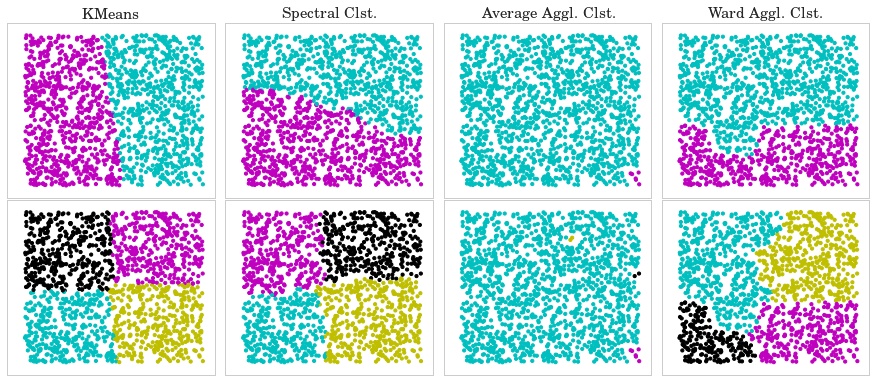

In [124]:
uniform = np.random.rand(n_samples, 2), None

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

for i, n_clrs in enumerate([2,4]):
    dataset=uniform
    i_dataset=0
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, 
                                          #eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            affinity="cityblock", n_clusters=n_clrs)
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(np.int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method, size=15)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.savefig("files/ch07/uniform.png",dpi=300, bbox_inches='tight')
plt.show()


/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)


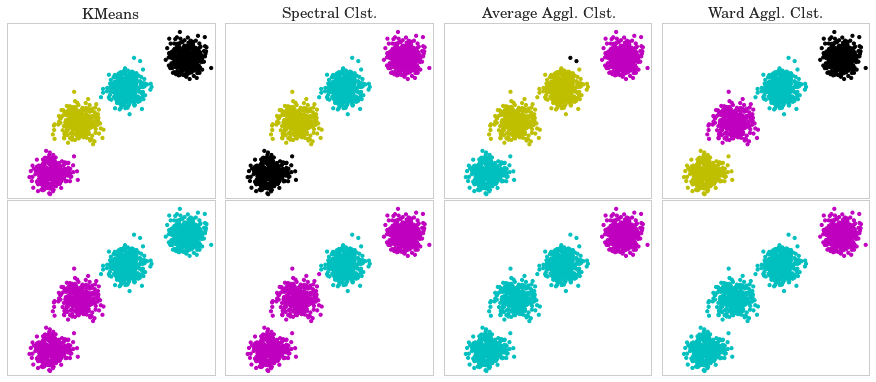

In [123]:
spheres = datasets.make_blobs(n_samples=n_samples, random_state=3, centers=4)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

for i, n_clrs in enumerate([4,2]):
    dataset=spheres
    i_dataset=0
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, 
                                          #eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            affinity="cityblock", n_clusters=n_clrs)
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(np.int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method, size=15)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.savefig("files/ch07/blobs.png",dpi=300, bbox_inches='tight')
plt.show()


/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)


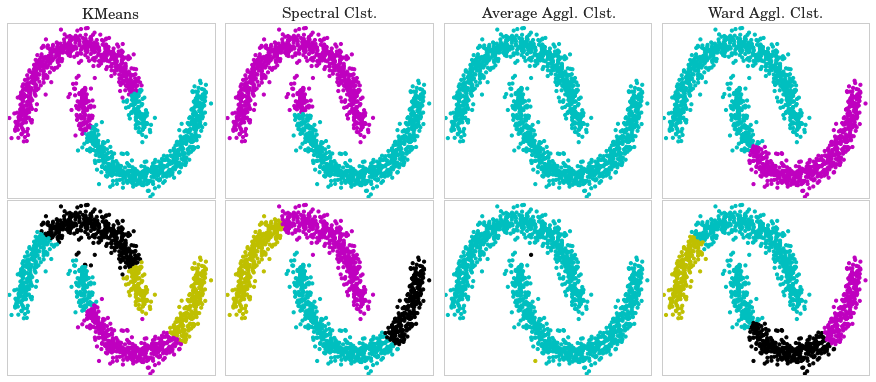

In [122]:
moons = datasets.make_moons(n_samples=n_samples, noise=.08)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

for i, n_clrs in enumerate([2,4]):
    dataset=moons
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)
    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, affinity="nearest_neighbors")
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            affinity="cityblock", n_clusters=n_clrs)
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(np.int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method, size=15)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.savefig("files/ch07/moons.png" , bbox_inches='tight')
plt.show()


The code provided by scikit-learn for comparing the different clustering techniques when  $k=4$  is as follows:

/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/an

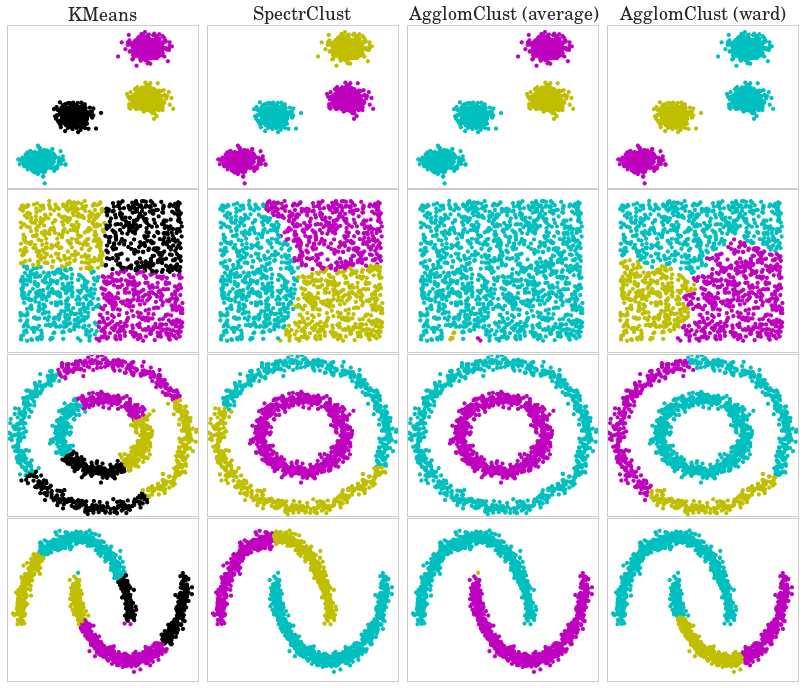

In [68]:
plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1

for i_dataset, dataset in enumerate([blobs,
                                     no_structure, noisy_circles, noisy_moons]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    means = cluster.KMeans(n_clusters=4)
    spectral = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=3,
                            connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(n_clusters=3,
                    linkage='ward', connectivity=connectivity)

    for name, algorithm in [('KMeans', means),('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)]:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1


plt.show()


The code provided by scikit-learn for comparing the different clustering techniques when $k=2$ is as follows:

/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/ssegui/an

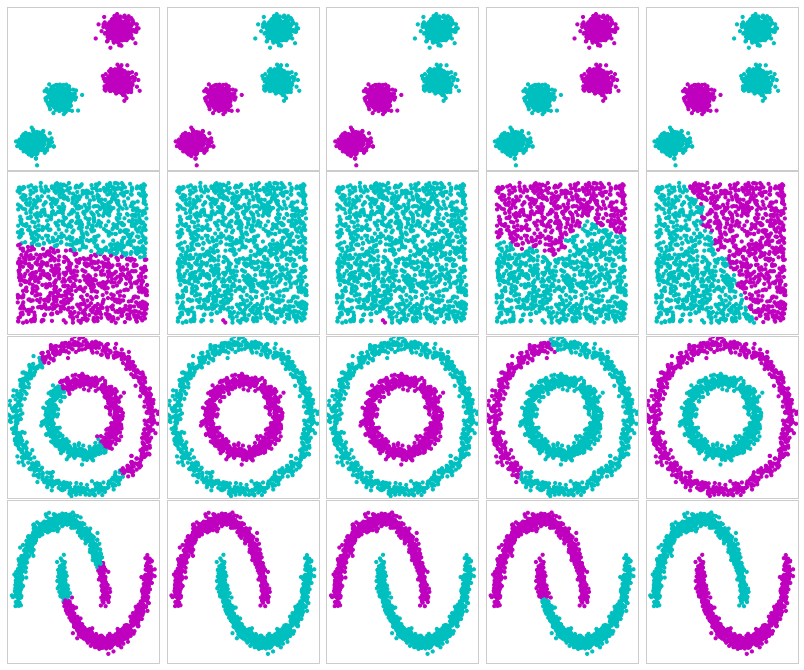

In [44]:
plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96,  wspace=.05, hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([blobs, no_structure, noisy_circles, 
                                     noisy_moons]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    means = cluster.KMeans(n_clusters=2)
    spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
                            affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=2, 
                            connectivity=connectivity)
    complete_linkage = cluster.AgglomerativeClustering(linkage="complete", 
                            affinity="cityblock", n_clusters=2, 
                            connectivity=connectivity)
    ward_linkage = cluster.AgglomerativeClustering(n_clusters=2,
                            linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (average)', complete_linkage),
                            ('AgglomClust (ward)', ward_linkage),
                            ('SpectrClust', spectral)
                           ]:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(4, 5, plot_num)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

We applied the discussed clustering techniques, namely: K-means, agglomerative clustering with average linkage, agglomerative clustering with complete linkage, agglomerative clustering with Ward linkage and spectral clustering.  Connectivity is applied in the algorithms where it is applicable. Regarding the simple cases of separated clusters of data, all clustering algorithms perform well, as expected. Regarding uniform distribution of data, K-means, Ward agglomerative clustering and spectral clustering tend to obtain even and compact clusters, while complete linkage and average linkage agglomerative clusterings try to agglomerate as much as possible close points following the rule: "rich get richer". This results in a second cluster of a small set of data. Regarding the embedded structures as in the case of the circles (the third row), K-means and Ward linkage agglomerative clustering try to obtain compact clusters and thus cannot separate the circles. Similar effect is observed with the moons example (the fourth row). Another fact worthful to emphasize from the illustrating example is the importance of knowing the number of clusters looked for, in the case of K-means, ward-linkage agglomerative clustering and spectral clustering, since the later also employs the K-means method. If k is not known, the average-linkage or complete-linkage agglomerative clustering is recommendable with the risk that it will not assure balanced clusters as final result.

# 3. CASE STUDY: EUROSTAT data analysis

Eurostat is the home of the [European Commission data](http://ec.europa.eu/eurostat). Eurostat’s main role is to process and publish comparable statistical information at European level. Data in Eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions).

## Applying clustering to analyze countries according to their education resourses

In order to illustrate the clustering on a real dataset, we will analyze the indicators on education finance data among the European member states, provided by the Eurostat data bank2. The data is organized by year (TIME): [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011] and country (GEO): ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']. Twelve indicators (INDIC ED) on education finance with their values (Value) are given like: 

+ 1) Expenditure on educational institutions from private sources as % of Gross Domestic Product (GDP), for all levels of education combined; 
+ 2) Expenditure on educational institutions from public sources as \% of GDP, for all levels of government combined, 
+ 3) Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined, 
+ 4) Public subsidies to the private sector as \% of GDP, for all levels of education combined, 
+ 5) Public subsidies to the private sector as \% of total public expenditure, for all levels of education combined, etc. We can store in a table the 12 indicators for a given year (e.g. 2010).

Let us start having a look at the data.

In [71]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('./files/ch07/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [72]:
edu.tail()

,TIME,GEO,INDIC_ED,Value
4915,2011,Japan,Total public expenditure on education as % of ...,NaN
4916,2011,Japan,Expenditure on educational institutions from p...,NaN
4917,2011,Japan,Public subsidies to the private sector as % of...,NaN
4918,2011,Japan,Expenditure on educational institutions from p...,1.56
4919,2011,Japan,Total public expenditure on education as % of ...,3.67


Data in CSV and databases are often organized in what is called **stacked** or **record** formats. In our case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`). Let us reshape the table into a feature vector style data set. 

To the process of reshaping stacked data into a table is sometimes called **pivoting**.

In [73]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Albania                                                 NaN                                                                                    
     Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Albania                                                 NaN                                          
     Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Albania                                                 NaN                                                               
     Austria  

In [74]:
print 'Let us check the two indices:\n'
print '\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist())
print '\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist())

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten years information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity, let us focus on values on year 2010.

In [75]:
#Extract 2010 set of values
edu2010=pivedu.ix[2010]
edu2010.head()


INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN


Let us clean and store the names of the features and the countries.

In [76]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'European Union (25 countries)': 'EU25',
                                'European Union (27 countries)': 'EU27',
                                'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
                                'Germany (until 1990 former territory of the FRG)': 'Germany'
                        })
features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(12)
edu2010.head()

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN


As we can observe, this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

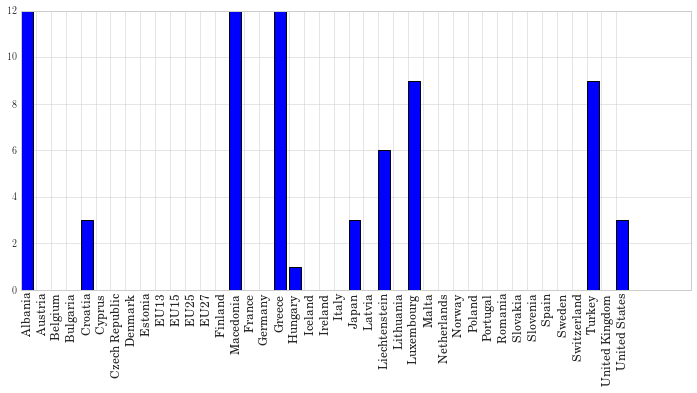

In [77]:
#Check what is going on in the NaN data 
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
           fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

We don't have info on Albania, Macedonia and Greece. And very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. Now let us check the features.

[1 0 3 0 3 0 0 0 0 0 0 3]


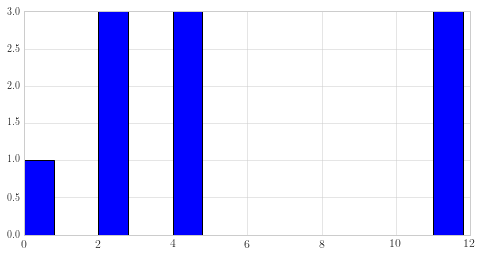

In [78]:
#Remove non info countries
wrk_countries = nan_countries<4

educlean=edu2010.ix[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print na_features

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

There are four features with missing data. At this point we can proceed in two ways:

+ **Fill in** the features with some non-informative, non-biasing data.
+ **Drop** the features with missing values.

If we have many features and only a few have missing values then it is not much harmful to drop them. However, if missing values are spread across the features, we have to eventually deal with them. In our case, both options seem reasonable, so we will proceed with both at the same time.

In [79]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print 'Filled in data shape: ' + str(edufill.shape)

#Option B drops those features
edudrop=educlean.dropna(axis=1) 
         #dropna: Return object with labels on given axis omitted where alternately any or 
          # all of the data are missing
print 'Drop data shape: ' + str(edudrop.shape)



Filled in data shape: (35, 12)
Drop data shape: (35, 8)


In the fill-in option, we have decided to fill the data with the mean value of the feature. This will not bias the distribution of the feature, though it has consequences in the interpretation of the results. 

Let us now apply a K-means clustering technique on this data in order to partition the countries according to their investment in education and check their profiles.

In [80]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
    
clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill) 
        #Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()

Let's visualize the result of the K-means clustering:

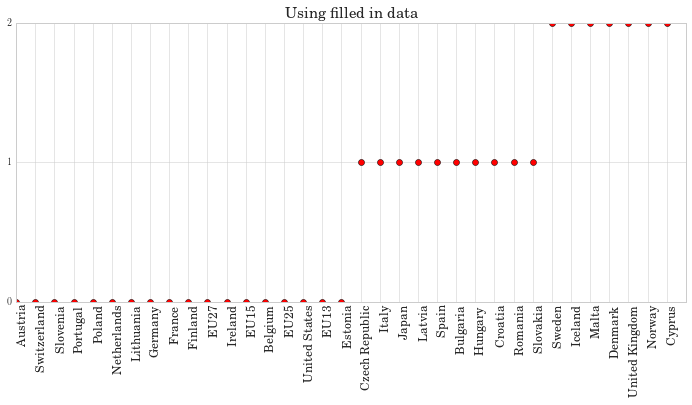

In [81]:
plt.plot(np.arange(35),y_pred_fill[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
plt.yticks([0,1,2])
fig = plt.gcf()

fig.set_size_inches((12,5))

Let's apply the clustering on the dataset with dropped missing values:

In [82]:
X_train_drop = edudrop.values
X_train_drop = scaler.fit_transform(X_train_drop)
    
clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

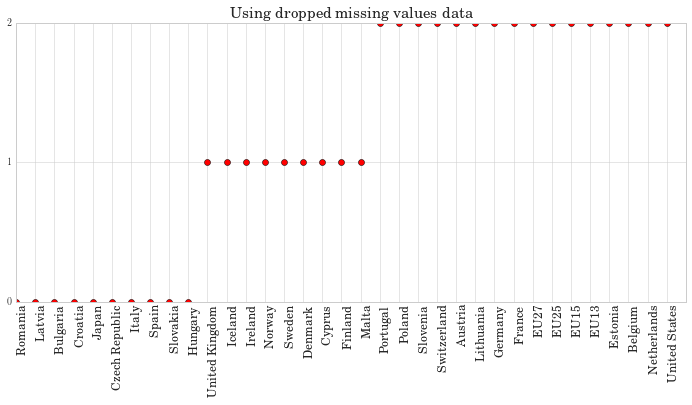

In [83]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))


We have sorted the data for better visualization. At a simple glance we can see that both partitions can be different. We can better check this effect plotting the clusters values of one technique against the other.

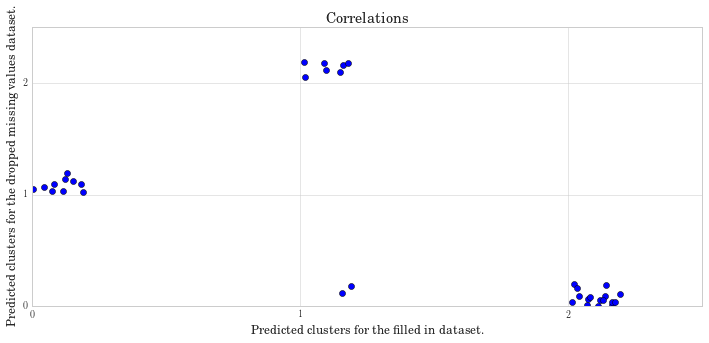

In [84]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.savefig("files/ch07/correlationkmeans.png",dpi=300, bbox_inches='tight')


Well, looking at both methods, both may yield the same results, but not necessarily always. This is mainly due to two aspects: the random initialization of the k-means clustering and the fact that each method works in a different space (dropped data vs filled-in data). 

Let us check the list of countries in both methods. Note that we should not consider the cluster value, since it is irrelevant.

In [85]:
print 'Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==0])
print 'Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==0])
print '\n'
print 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==1])
print 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==1])
print '\n'
print 'Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==2])
print 'Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==2])
print '\n'


Cluster 0: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']
Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']
Cluster 1: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']


Cluster 2: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']




Let us check the profile of the clusters by looking at the centroids:

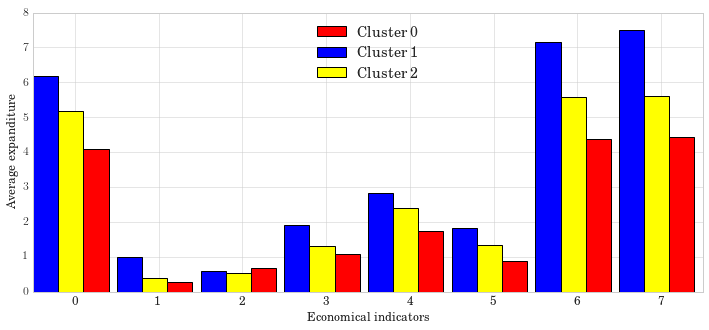

In [86]:
width=0.3
p1 = plt.bar(np.arange(8),scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b')
        # Scale back the data to the original representation
p2 = plt.bar(np.arange(8)+width,scaler.inverse_transform(clf.cluster_centers_[2]),
             width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,scaler.inverse_transform(clf.cluster_centers_[0]),
             width,color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()

plt.savefig("files/ch07/clusterexpenditure.png",dpi=300, bbox_inches='tight')


It looks like cluster `1` spends more on education while cluster `0` is the one with less resources on education. (What about Spain?)

Let us refine a little bit more cluster `0` and check how close are members from this cluster to cluster `1`. This may give us a hint on a possible ordering. 

([<matplotlib.axis.XTick at 0x1192f4d90>,
 <a list of 10 Text xticklabel objects>)

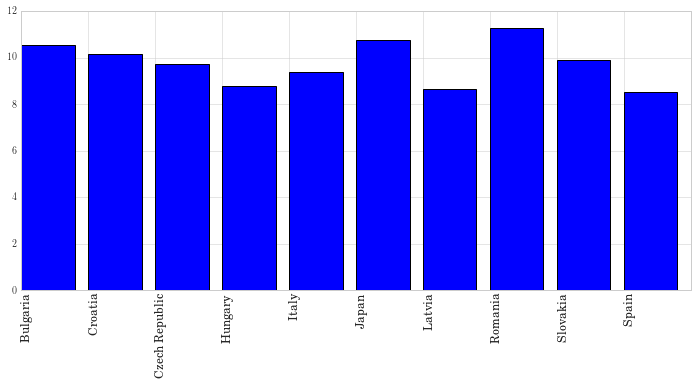

In [96]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean') 
                  #the distance of the elements of cluster 0 to the center of cluster 1
plt.bar(np.arange(p.shape[0]),p)

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)



Well, it seems that Spain belongs to cluster `0`, it is the closest to change to a policy in the lines of the other clusters.

Additionally, we can also check the distance to the centroid of cluster `0`.

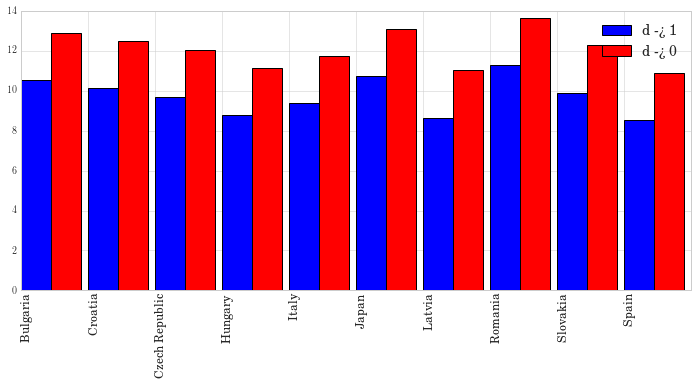

In [97]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
pown = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')

width=0.45
p0=plt.bar(np.arange(p.shape[0]),p,width)
p1=plt.bar(np.arange(p.shape[0])+width,pown,width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=1)
plt.savefig("files/ch07/dist2cluster01.png",dpi=300, bbox_inches='tight')


Let us redo the clustering with $K=4$ and see what we can conclude.

In [98]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

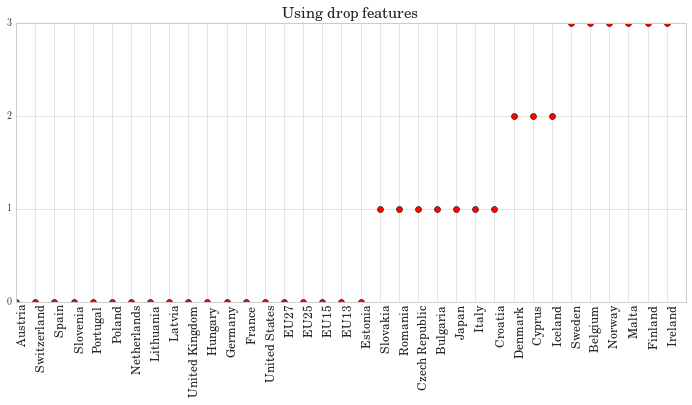

In [99]:
idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
           horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

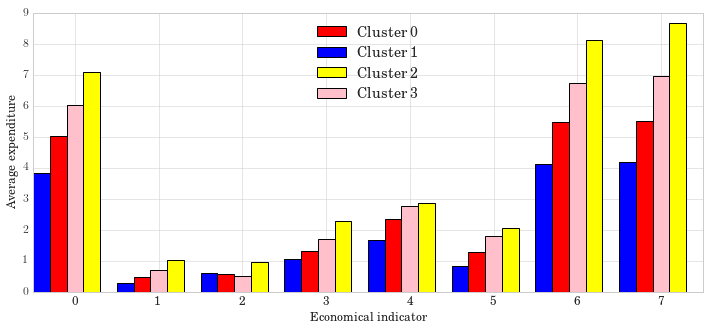

In [100]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2', 
                                           'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))
plt.savefig("files/ch07/distances4clusters.png",dpi=300, bbox_inches='tight')


Spain is still in cluster `0`. But as we observed in our previous clustering it was very close to changing cluster. This time cluster `0` includes the averages values for the EU members. Just for the sake of completeness, let us write down the name of the countries in the clusters.

In [101]:
print 'Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0])

print 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1])

print 'Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2])

print 'Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3])

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 2: 
['Cyprus', 'Denmark', 'Iceland']
Cluster 3: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']


We can repeat the process using the alternative clustering techniques and compare their results. Let us first apply the spectral clustering. The corresponding code will be:

In [102]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)
 
distances = euclidean_distances(edudrop.values)
    
spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)
 
y_pred = spectral.labels_.astype(np.int)

If we visualize the results:

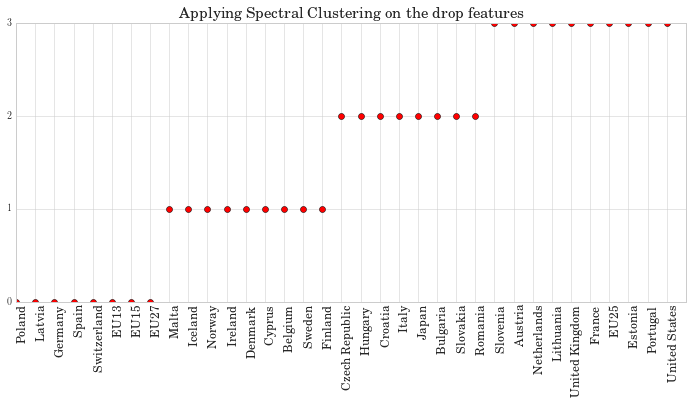

In [103]:
idx=y_pred.argsort()

plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] 
        for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

Note that in general, the spectral clustering intends to obtain more balanced clusters. In this way, the predicted cluster 1 merges the cluster 2 and 3 of the K-means clustering, cluster 2 corresponds to the cluster 1 of the K-means clustering, cluster 0 mainly goes to cluster 2, and clusters 3 corresponds to cluster 0 of the K-means.

Applying the agglomerative clustering, we obtain not only the different clusters, but also we can see how different clusters are obtained. This, in some way it is giving us information on which are the pairs of countries and clusters that are most similar. The corresponding code that applies the agglomerative clustering is:

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

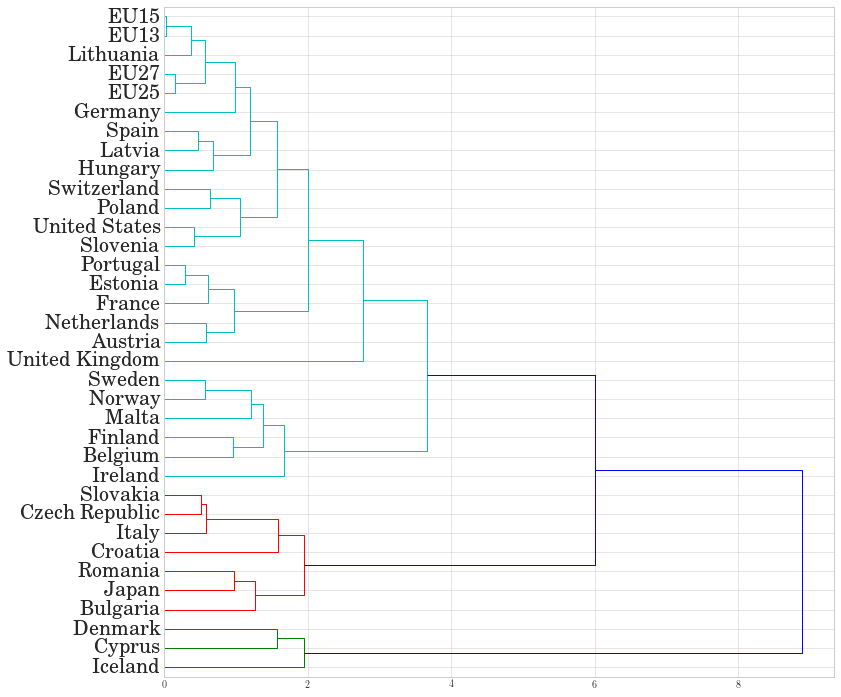

In [121]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);

plt.savefig("files/ch07/ACCountires.png",dpi=300, bbox_inches='tight')
plt.show()

#plt.tight_layout()  # fixes margins


In scikit-learn, the parameter color\_threshold colors all the descendent links below a cluster node k the same color if k is the first node below the color threshold. All links connecting nodes with distances greater than or equal to the threshold are colored blue. Thus, if we use color threshold = 3, the obtained clusters are as follows:

+ Cluster 0: ['Cyprus', 'Denmark', 'Iceland']
+ Cluster 1: ['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
+ Cluster 2: ['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']
+ Cluster 3: ['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']

Note that they correspond in high degree to the clusters obtained by the K-means (except permutation of clusters labels that is irrelevant). The figure shows the construction of the clusters using the complete linkage agglomerative clustering. Different cuts at different levels of the dendrogram allow to obtain different number of clusters. As a summary, let us compare the results of the three approaches of clustering. We cannot expect that the results coincide since different approaches are based on different criteria to construct the clusters. Still, we can observe that in this case K-means and the agglomerative approaches gave the same results (up to a permutation of the number of cluster that is irrelevant), meanwhile the spectral clustering gave more evenly distributed clusters. It fused cluster 0 and 2 of the agglomerative clustering in cluster 1, and split cluster 3 of agglomerative clustering in clusters 0 and 3 of it. Note that these results can change when using different distance between data.

## 4 Conclusions

In this chapter, we have introduced the unsupervised learning problem as a problem of knowledge or structure discovery from a set of unlabeled data. We have focused on the clustering as one of the main problems for unsupervised learning. Basic concepts like distance, similarity, connectivity and quality of the clustering results have been discussed as main elements to determine before choosing a specific clustering technique. Three basic clustering techniques have been introduced, mainly: K-means, agglomerative clustering and spectral clustering. We have discussed their advantages and disadvantages and compared them on different synthetic examples. One of the important parameters for most clustering techniques is the number of clusters expected. Regarding the scalability, K-means allows to be applied on very large datasets, but the number of clusters should be as much as medium due to its iterative procedure. Spectral clustering can manage not very large datasets and number of clusters, since it is based on computing the eigenvectors of its affinity matrix. In this aspect, best option is the hierarchical clustering that allows large number of samples and clusters. Regarding its use, K-means is able to discover mainly data with at geometry (isotropic and compact clusters), while spectral clustering and agglomerative clustering with average and complete linkage are able to detect data with non-flat geometry. The connectivity graph is specially helpful in such cases. At the end, a case study from a database of Eurostat has been considered to show the applicability of the clustering on real
datasets.

<small><i> This notebook was created by [Petia Radeva](http://www.cvc.uab.es/~petia) and [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Last edition: 15 of July, 2016.</i></small>